In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
from api_keys import weather_key
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")

# Study data files
research = "COVID19_ healthcare_workers.csv"
complete = "complete.csv"
state_level = "state_level_latest.csv"

# Read data and the study results
research_df = pd.read_csv(research,encoding="cp1252")
complete_df = pd.read_csv(complete)
state_level_df = pd.read_csv(state_level)

# Feels

In [99]:
# Renaming and deleting columns in research_df:

research_df = research_df.rename(columns={"Timestamp":"date",
                                          "Please indicate your age":"age",
                                          "Gender":"gender",
                                          "Please indicate which Indian State/Union territory you are currently residing in ":"state",
                                          "Educational qualification":"education_level",
                                          "Marital status":"marital_stayus",
                                          "Are you currently COVID-19 positive? ":"tested_positive_self",
                                          "Do you know any family member(s) or friend(s) who has/have tested positive for COVID-19?":"tested_positive_ff",
                                          "During the lockdown period, indicate who you are living with:":"living_with",
                                          "Have you ever been diagnosed with any anxiety disorder by a health worker like a psychiatrist/psychologist/counselor before?":"anxiety_diagnosed",
                                          "What is the amount of close contact you have with patients":"contact_patients",
                                          "What do you feel about your monetary situation during  the COVID 19 pandemic phase?":"monetary_perception",
                                          "Please choose the category that applies to you":"job_description",
                                          "I am scared of how other people will react if I tell them I work at the hospital during the widespread prevalence of COVID-19.":"scared_people_reaction",
                                          "There have been times when I was not allowed to enter the society/ colony where I live because I am a health care worker.":"denied_by_community",
                                          "With regard to travel to the hospital select that which suits you most":"work_distance",
                                          "My family expresses fear towards my work.":"family_fear",
                                          "During the COVID-19 lockdown, I have received support from (you can select more than one answer)":"support_from",
                                          "During the COVID-19 lockdown, I faced difficulties/problems with (you can select more than one answer)":"difficulties_with",
                                          "The hospital has provided me with adequate personal protective equipment":"protection_provided",
                                          "Do you fear being physically beaten up by patients or their families due to lack of equipment to treat them (like ventilators)? ":"aggretions_fear",
                                          "I felt dizzy, lightheaded, or faint, when I read or listened to news about the coronavirus.":"colapsed_by_news",
                                          "I had trouble falling or staying asleep because I was thinking about the coronavirus.":"insomnia",
                                          "I felt paralyzed or frozen when I thought about or was exposed to information about the coronavirus.":"frozen_by_info",
                                          "I lost interest in eating when I thought about or was exposed to information about the coronavirus.":"appetite_loss",
                                          "I felt nauseous or had stomach problems when I thought about or was exposed to information about the coronavirus.":"nauseated_by_info",
                                          "I had disturbing thoughts that I may have caught the coronavirus.":"fear_of_infection_self",
                                          "I had disturbing thoughts that certain people I saw may have the coronavirus.":"fear_of_infection_ff",
                                          "I could not stop thinking about the coronavirus.":"anxiety_covid",
                                          "I dreamed about the coronavirus.":"dreams_covid",
                                          "At my work, I feel bursting with energy":"energized_at_work",
                                          "At my job, I feel strong and vigorous":"vigorous_at_work",
                                          "I am enthusiastic about my job":"enthusiastic_at_work",
                                          "My job inspires me":"inspired_at_work",
                                          "When I get up in the morning, I feel like going to work":"motivated_at_work",
                                          "I feel happy when I am working intensely":"happy_at_work",
                                          "I am proud of the work that I do":"proud_at_work",
                                          "I am immersed in my work":"immersed_at_work",
                                          "I get carried away when I am working":"carried_away_at_work",
                                          "My job made me feel angry.":"feel_angry",
                                          "My job made me feel anxious.":"feel_anxious",
                                          "My job made me feel at ease.":"feel_at_ease",
                                          "My job made me feel bored.":"feel_bored",
                                          "My job made me feel calm.":"feel_calm",
                                          "My job made me feel content.":"feel_content",
                                          "My job made me feel depressed.":"feel_depressed",
                                          "My job made me feel discouraged.":"feel_discouraged",
                                          "My job made me feel disgusted.":"feel_disgusted",
                                          "My job made me feel ecstatic.":"feel_ecstatic",
                                          "My job made me feel energetic.":"feel_energetic",
                                          "My job made me feel enthusiastic.":"feel_enthusiastic",
                                          "My job made me feel excited.":"feel_excited",
                                          "My job made me feel fatigued.":"feel_fatigued",
                                          "My job made me feel frightened.":"feel_frightened",
                                          "My job made me feel furious.":"feel_furious",
                                          "My job made me feel gloomy.":"feel_gloomy",
                                          "My job made me feel inspired.":"feel_inspired",
                                          "My job made me feel relaxed.":"feel_relaxed",
                                          "My job made me feel satisfied.":"feel_satisfied",
                                          "Is there anything else that you would like to share with regard to your mental health and well-being during the COVID-19 phase?":"additional_comments"})

del research_df["additional_comments"]


In [129]:
# Feels by State

feels = []

for col in research_df.columns:
    if "feel_" in col:
        feels.append(col)

feels_df = research_df[feels].copy().astype("float")
feels_df = research_df[["state"]].join(feels_df)
feels_df = feels_df.dropna(how="any")

feels_df = feels_df.groupby("state").median()

feels_df.head()

,feel_angry,feel_anxious,feel_at_ease,feel_bored,feel_calm,feel_content,feel_depressed,feel_discouraged,feel_disgusted,feel_ecstatic,feel_energetic,feel_enthusiastic,feel_excited,feel_fatigued,feel_frightened,feel_furious,feel_gloomy,feel_inspired,feel_relaxed,feel_satisfied
state,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,2.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0
Arunachal Pradesh,1.0,1.0,5.0,1.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0
Assam,2.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,1.0,4.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,5.0,4.0,5.0
Bihar,2.0,2.0,4.0,1.5,4.0,3.5,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.5,1.0,1.0,1.5,4.0,3.5,4.0
Chandigarh,2.0,3.0,4.0,2.0,4.0,5.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,3.0,3.0,1.0,1.0,5.0,4.0,5.0


In [130]:
# Defined negative and positive feelings

neg_feels = ['feel_angry',
             'feel_anxious',
             'feel_bored',
             'feel_depressed',
             'feel_discouraged',
             'feel_disgusted',
             'feel_fatigued',
             'feel_frightened',
             'feel_furious',
             'feel_gloomy']

pos_feels = ['feel_at_ease',
             'feel_calm',
             'feel_content',
             'feel_ecstatic',
             'feel_energetic',
             'feel_enthusiastic',
             'feel_excited',
             'feel_inspired',
             'feel_relaxed',
             'feel_satisfied']

neg_feels_state_df = pd.DataFrame(feels_df[neg_feels].mean(axis=1),columns=["neg_feels"])
pos_feels_state_df = pd.DataFrame(feels_df[pos_feels].mean(axis=1),columns=["pos_feels"])

feels_df = pd.merge(
           pd.merge(feels_df,
                    neg_feels_state_df,on="state"),
                    pos_feels_state_df,on="state")

# Defined overall feeling score as the diff between positive and negative scores

feels_df["score_overall"] = feels_df["pos_feels"]-feels_df["neg_feels"]

feels_df[["neg_feels","pos_feels","score_overall"]].head()

,neg_feels,pos_feels,score_overall
state,,,
Andhra Pradesh,1.70,3.5,1.80
Arunachal Pradesh,1.40,5.0,3.60
Assam,1.30,4.8,3.50
Bihar,1.35,3.9,2.55
Chandigarh,1.80,4.2,2.40


In [102]:
# General Feels Score

print(f"Positive Score: {round(feels_df[pos_feels].mean().mean(),1)}")
print(f"Negative Score: {round(feels_df[neg_feels].mean().mean(),1)}")
print(f"Overall Score (pos-neg): {round(feels_df[pos_feels].mean().mean()-feels_df[neg_feels].mean().mean(),1)}")
print("-----")
print("In conclusion, the responders to this poll are more likely to feel positive than negative about their jobs.")

Positive Score: 3.7
Negative Score: 1.5
Overall Score (pos-neg): 2.2
-----
In conclusion, the responders to this poll are more likely to feel positive than negative about their jobs.


In [103]:
## Cleaning Data
#feels_df["state"] = feels_df["state"].replace("Telangana","Hyderabad")
#
#feels_df = feels_df.dropna(how="any")
#
#feels_df

In [104]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# Loop through the list of research_states and perform a request for data on each
for index,row in feels_df.iterrows():
    
    try:
        response = requests.get(query_url + str(index)+",IN").json()
        feels_df.loc[index,"longitude"] = response["coord"]["lon"]
        feels_df.loc[index,"latitude"] = response["coord"]["lat"]
        feels_df.loc[index,"temperature"] = response['main']['temp']
    
    except:
        response = requests.get(query_url + "Hyderabad" + ",IN").json()
        feels_df.loc[index,"longitude"] = response["coord"]["lon"]
        feels_df.loc[index,"latitude"] = response["coord"]["lat"]
        feels_df.loc[index,"temperature"] = response['main']['temp']               
        pass


In [105]:
# Configure the map
map_plot = feels_df.hvplot.points("longitude",
                                  "latitude",
                                  geo = True,
                                  tiles = "OSM",
                                  frame_width = 800,
                                  frame_height = 600,
                                  size="score_overall",
                                  scale=20,
                                  color="score_overall",
                                  cmap="Wistia",
                                  alpha=0.5,
                                  label="state")

# Display the map plot
map_plot

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [longitude,latitude]   (score_overall)

# Cases

In [106]:
# Cleaning and joining
complete_df = complete_df.rename(columns={"Name of State / UT":"State"})

coord_df = pd.merge(complete_df.groupby("State")["Latitude"].apply(lambda x: x[x.index.max()]),
                    complete_df.groupby("State")["Longitude"].apply(lambda x: x[x.index.max()]),
                    on="State")


In [107]:
# Cleaning
cases_df = state_level_df.groupby("State").agg({"Confirmed":"sum",
                                                "Recovered":"sum",
                                                "Deaths":"sum",
                                                "Active":"sum"
                                                })

cases_df = cases_df[["Confirmed","Recovered","Deaths","Active"]]

In [108]:
# Merging and cleaning
state_cases_df = pd.merge(coord_df,cases_df,on="State",how="right")
state_cases_df = state_cases_df.dropna(how="any")

In [109]:
# Cleanig Data
total_confirmed = state_cases_df["Confirmed"].sum()
total_deaths = state_cases_df["Deaths"].sum()
total_active = state_cases_df["Active"].sum()

for index,row in state_cases_df.iterrows():
    
    state_cases_df.loc[index,"%_Confirmed_Country"] = int(row["Confirmed"])/total_confirmed*100
    state_cases_df.loc[index,"%_Deaths_Country"] = int(row["Deaths"])/total_deaths*100
    state_cases_df.loc[index,"%_Active_Country"] = int(row["Active"])/total_active*100
    state_cases_df.loc[index,"Death_Rate"] = int(row["Deaths"])/int(row["Confirmed"])*100
    
state_cases_df["%_Confirmed_Country"] = state_cases_df["%_Confirmed_Country"].map("{:.1f}%".format)
state_cases_df["%_Deaths_Country"] = state_cases_df["%_Deaths_Country"].map("{:.1f}%".format)
state_cases_df["%_Active_Country"] = state_cases_df["%_Active_Country"].map("{:.1f}%".format)


In [128]:
# Configure the map
map_plot_2 = state_cases_df.hvplot.points(x="Longitude",
                                          y="Latitude",
                                          geo = True,
                                          tiles = "OSM",
                                          frame_width = 800,
                                          frame_height = 600,
                                          size="Deaths",
                                          scale=0.5,
                                          label="State",
                                          color="Deaths",
                                          cmap="Wistia",
                                          alpha=0.5,
                                          hover_cols = ["State",
                                                        "Confirmed",
                                                        "Recovered",
                                                        "Active",
                                                        "Death_Rate"])

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [Longitude,Latitude]   (Deaths,State,Confirmed,Recovered,Active,Death_Rate)

In [121]:
# Function: Linear Regression

def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Linear Regression")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")

    plt.show()


# Function: Regression of second degree

def regression(x,y,x_label,y_label,line_color,c_x,c_y):

    # Fit a second-order polynomial
    coeffs = np.polyfit(x, y, deg=2)
    a, b, c = coeffs

    # Create a new x-axis for plotting the regression line
    x_line = np.linspace(x.min(), x.max(), 100)

    # Evaluate the polynomial at the new x-axis values
    y_line = a*x_line**2 + b*x_line + c

    eq = f"y = {str(round(a,2))}xˆ2 + {str(round(b,2))}ˆx + {str(round(c,2))}"

    plt.annotate(eq,(c_x,c_y),fontsize=15,color="red")

    r_value = np.corrcoef(np.polyval(coeffs, x), y)[0,1]
    print("r_value: ",r_value)

    # Plot the original data and the regression line
    plt.scatter(x, y)
    plt.plot(x_line, y_line,color=line_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("2nd Degree Regression")
    plt.show()


# Function: Regression of third degree

def regression_third(x,y,x_label,y_label,line_color,c_x,c_y):

    # Fit a second-order polynomial
    coeffs = np.polyfit(x, y, deg=3)
    a, b, c, d = coeffs

    # Create a new x-axis for plotting the regression line
    x_line = np.linspace(x.min(), x.max(), 100)

    # Evaluate the polynomial at the new x-axis values
    y_line = a*x_line**3 + b*x_line**2 + c*x_line + d

    eq = f"y = {str(round(a,2))}xˆ3 + {str(round(b,2))}xˆ2 + {str(round(c,2))}ˆx + {str(round(d,2))}"

    plt.annotate(eq,(c_x,c_y),fontsize=15,color="red")

    r_value = np.corrcoef(np.polyval(coeffs, x), y)[0,1]
    print("r_value: ",r_value)

    # Plot the original data and the regression line
    plt.scatter(x, y)
    plt.plot(x_line, y_line,color=line_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("3rd Degree Regression")
    plt.show()


# Fuction: Outlier plot

def outliers(districution,title,y_label):
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    ax1.boxplot(districution)
    plt.show()


r_value:  0.5504772142311846


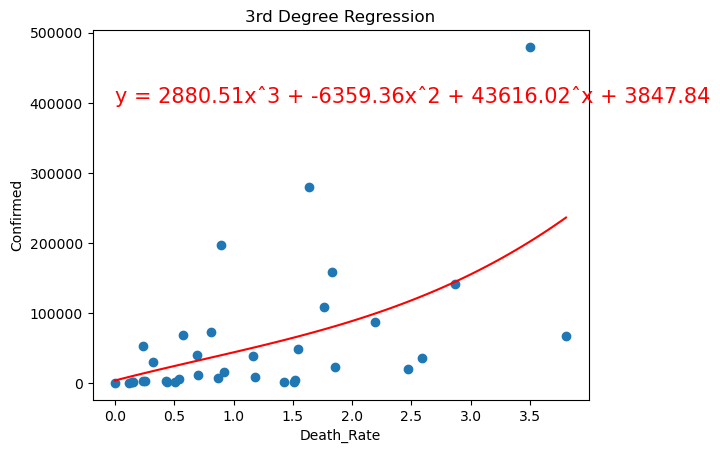

r_value:  0.5496347256164887


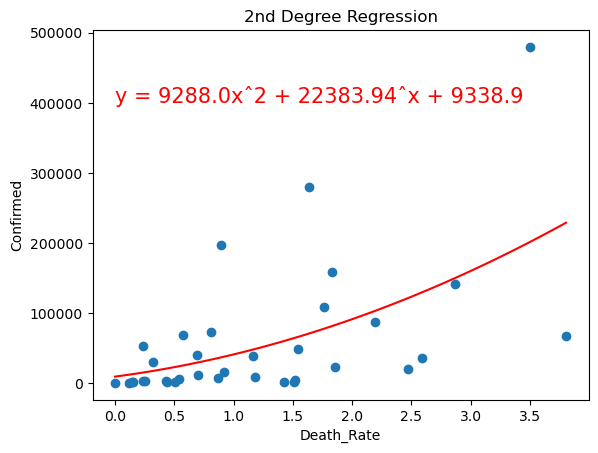

The r-value is: 0.29116750190464835


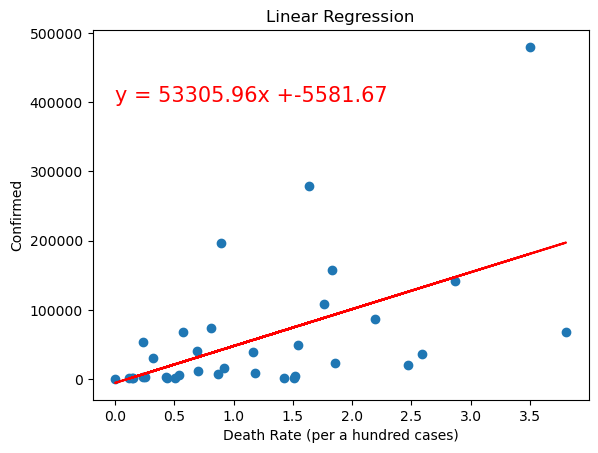

In [122]:
regression_third(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death_Rate","Confirmed","red",0,400000)
regression(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death_Rate","Confirmed","red",0,400000)
linear_regression(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death Rate (per a hundred cases)","Confirmed",0,400000)

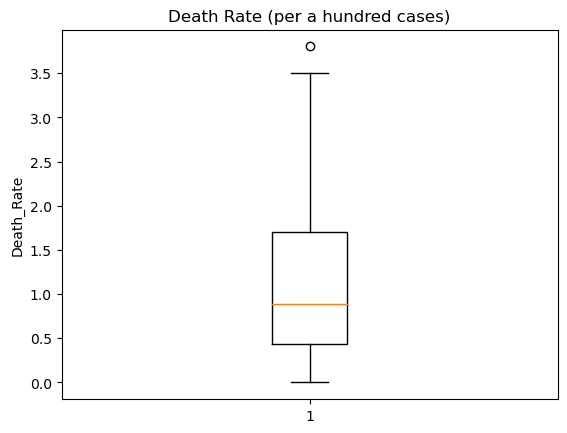

In [90]:
outliers(state_cases_df["Death_Rate"],"Death Rate (per a hundred cases)","Death_Rate")

# score_overall vs Cases

#### A weak positive correlation between "Death_Rate" and "score_overall" is indicated, suggesting that higher rates of death are associated with more negative emotions overall among the HP community.

In [97]:
rel = feels_df[["score_overall"]].join(state_cases_df[["Latitude","Longitude","Confirmed","Active","Deaths","Death_Rate"]])

The r-value is: 0.054074142545078877


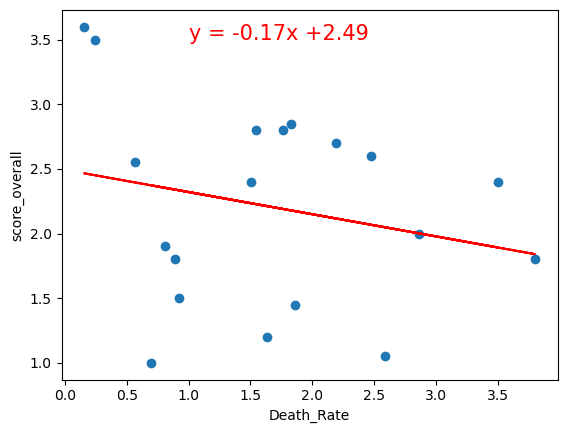

In [ ]:
linear_regression(rel["Death_Rate"],rel["score_overall"],"Death_Rate","score_overall",1,3.5)

### Other associations

The r-value is: 0.0029206339284293635


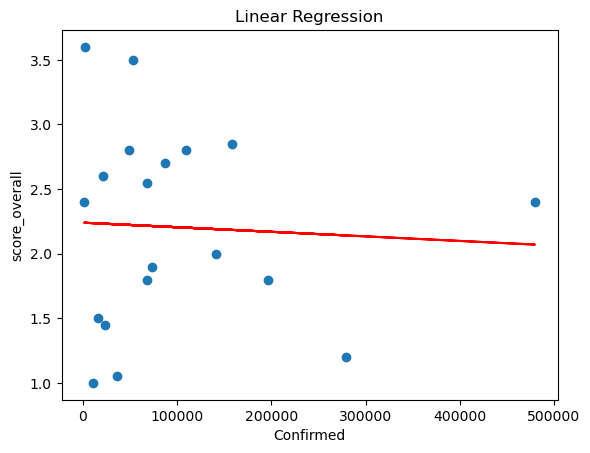

In [126]:
linear_regression(rel["Confirmed"],rel["score_overall"],"Confirmed","score_overall",2000000,3.5)


The r-value is: 0.00023102119803017202


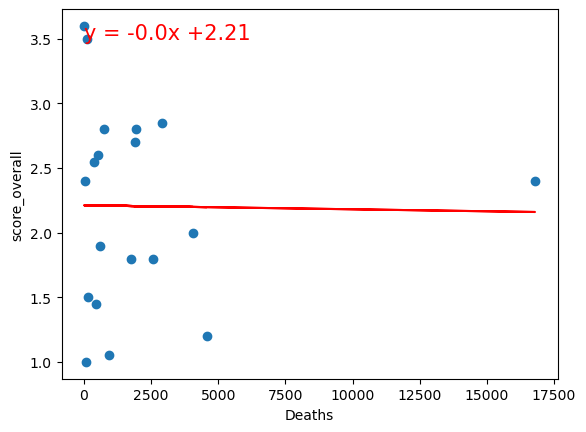

In [ ]:
linear_regression(rel["Deaths"],rel["score_overall"],"Deaths","score_overall",1,3.5)


The r-value is: 0.0029073951498559186


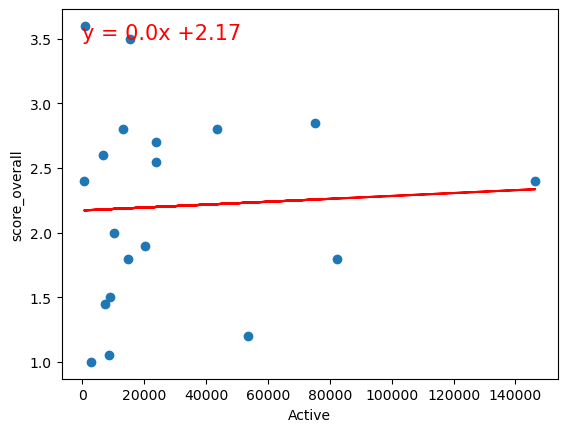

In [94]:
linear_regression(rel["Active"],rel["score_overall"],"Active","score_overall",1,3.5)
